# Week 4

## Overview

Ok, we've arrived at week 4. This lecture covers:

1. **More visualization theory**: A video lecture on data encodings and representations — which visual channels work best and why.
2. **Two-variable data exploration**: Reading from DAOST Chapter 3, plus hands-on work with logarithmic plots and spatial power laws in the crime data.
3. **Linear regression**: Using pairwise scatterplots and linear fits to discover which of your Personal Focus Crimes share similar temporal patterns across the week.

*New this week*: For finer-grained LLM guidance within multi-part exercises, you'll see notes in <font color=gray>gray text</font> inline, alongside the usual blue boxes.

## Part 1: More lecturing on dataviz

We begin today by learning more about the theory of visualization, digging into data encodings and representations.

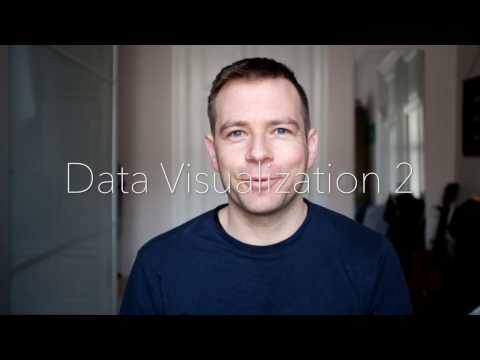

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('zE6Nr8trdrw', width=800, height=450)

> *Exercise 1.1:* Some questions about the video. 
>
> * Mention 10 examples of ways we can encode data.

1. Position on the x-axis
2. Position on the y-axis
3. Length
4. Angle
5. Area
6. Color hue
7. Color intensity/lightness
8. Shape
9. Size (symbol size)
10. Orientation

> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

No. Encodings are not equally effective because the eye estimates some channels much more accurately than others.

Example from previous lectures: in Week 3 we compared bar charts and histograms, and also discussed how bin choices change the message. Bar length/position is usually easy to compare, while angle/area (like in pie-style encodings) is much harder to judge precisely.

> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

Three difficult encodings:
- Angle
- Area
- Color hue for many close categories

Online example using one of them: treemaps (e.g., stock-market heatmaps) rely heavily on area, which is harder to compare precisely than position/length.

> * Explain in your own words: What is the problem with pie-charts?

Pie charts encode values as angles/areas, which are hard to compare accurately, especially when slices are similar in size. They also become cluttered with many categories. For exact comparison, bars (shared baseline) are usually clearer.

<div class="alert alert-block alert-info">
Try to answer these using your human brain, don't use an LLM.
</div>


## Part 2: Exploratory data visualization, two variables  

I told you how I love the Data Analysis with Open Source Tools book. If you managed to read Chapter 3, which is about visualizing data with two variables, before coming to class today it's great. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **Like Last week, you can find it on Teams**.

And now a few exercises to reflect on the text:

*Exercise 2.1:* Questions from DAOST Chapter 3.

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?

The points lie very close to a smooth curve with only small deviations, indicating that variability around the underlying relationship is minimal. Because the scatter around the trend is tight rather than wide, the visual impression is that noise is small relative to the signal.

> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?

A common example is house prices versus floor area, where homes of similar size can have very different prices due to location, condition, or amenities. The same x-value corresponds to multiple plausible y-values because additional variables influence the outcome.

> * What are the two methods Janert mentions for smoothing noisy data? Can you think of other ones?

Janert discusses smoothing splines and LOESS/LOWESS. Other methods include moving averages, kernel smoothing, Gaussian process regression, Savitzky–Golay filters, and local polynomial regression.

> * What are residuals? Why is it a good idea to plot the residuals of your fit?

Residuals are the differences between observed values and fitted values. Plotting them helps detect model failures such as nonlinearity, heteroscedasticity, trends, or outliers that are not obvious in the original plot.

> * Explain in your own words the point of the smooth tube in figure 3-7.

The smooth tube provides a visual sense of variability around the fitted trend by showing separate smooth boundaries above and below the main curve. It acts as an informal depiction of spread or uncertainty without relying on strict statistical assumptions.

> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?

Banking adjusts the aspect ratio so typical slopes appear near 45°, where humans judge slope most accurately. It leverages our sensitivity to angle perception. Problems include distorted geometry, extreme plot shapes, and the risk of overemphasizing slope differences while compressing other features.

> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68–69 in your own words.

Graphical analysis is exploratory, iterative, and focused on gaining insight quickly, often using rough plots. Presentation graphics are designed for communication, requiring clarity, labeling, explanation, and polish. The goals differ: discovery versus explanation.

<div class="alert alert-block alert-info">
Read the text and answer the questions to make sure you get it. No need for LLMs here
</div>

Ok. Let's briefly talk about logarithms and logarithmic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover? <font color=gray>First think, use your brain to answer, then it's OK to get further inspiration from your LLM. The same goes for the next little question.</font>

A semi-log plot is most helpful for discovering exponential-type relationships, where one variable changes multiplicatively as the other changes additively, because an exponential trend becomes a straight line when you plot $\log y$ versus $x$ (or $\log x$ versus $y$). It is also useful whenever relative changes (percent changes) matter more than absolute changes, since equal vertical distances correspond to equal multiplicative factors.

>    * What kind of functions will loglog plots help you see?

Log-log plots help you see power-law relationships, because functions of the form $y = Cx^k$ become linear when plotted as $\log y$ versus $\log x$, with the slope corresponding to $k$. They also make multiplicative scaling patterns and wide-range data easier to compare because both axes are compressed by orders of magnitude.

> * Second, create a version of "Distribution of crime occurences over time" from Week 1's Exercise 3.2, where you display the $y$-axis values on log-scale. Comment on what the plot looks like. Do any new insights arise?

In [2]:
### ALREADY DONE IN WEEK 1 --> FOR THE ASSIGNMENT JUST SAVE IMAGES DURING WEEK1, THEN LOAD THEM HERE AND DO SOME ANALYSIS

> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. <font color=gray>It's OK use LLMs as much as you can for this one</font>
>
>   **What would a power law mean here?** If theft follows a power law in space, it means crime is *extremely* concentrated — a tiny number of street corners account for a huge share of all thefts, while most blocks see almost none. This kind of extreme inequality is the hallmark of power-law distributions, and it has real consequences for how we think about "safe" vs. "dangerous" neighborhoods.
>
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. If you want help, plus see how this is done with all the bells and whistles, we've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>       * **Hint 4**. Ask your LLM.

In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd

# Load merged dataset
merged_path = Path(r"C:\Users\slupo\OneDrive\Documentos\DTU\Social data analysis and visualization") / "sf_crime_merged_focus_2003_2025.csv"
df = pd.read_csv(merged_path, low_memory=False)

# Required columns
coords = ["latitude", "longitude"]

# -----------------------------
# Step 1: SF grid (all incidents)
# -----------------------------
d_all = df[coords].copy()
d_all = d_all.dropna(subset=coords)

# Approximate SF peninsula bounding box
lat_min, lat_max = 37.70, 37.84
lon_min, lon_max = -122.53, -122.35
d_all = d_all[
    d_all["latitude"].between(lat_min, lat_max)
    & d_all["longitude"].between(lon_min, lon_max)
].copy()

if d_all.empty:
    raise ValueError("No rows left after coord cleaning + SF peninsula filter.")

# Approximate 100m x 100m cells (degrees)
cell_size_m = 100
lat_step = cell_size_m / 111_320
lon_step = cell_size_m / (111_320 * np.cos(np.deg2rad(d_all["latitude"].mean())))

lat0, lat1 = d_all["latitude"].min(), d_all["latitude"].max()
lon0, lon1 = d_all["longitude"].min(), d_all["longitude"].max()

lat_edges = np.arange(lat0, lat1 + lat_step, lat_step)
lon_edges = np.arange(lon0, lon1 + lon_step, lon_step)

if len(lat_edges) < 2:
    lat_edges = np.array([lat0, lat1 + lat_step])
if len(lon_edges) < 2:
    lon_edges = np.array([lon0, lon1 + lon_step])

# Grid template
grid, _, _ = np.histogram2d(
    x=d_all["longitude"],
    y=d_all["latitude"],
    bins=[lon_edges, lat_edges]
)

print(f"Step 1 grid shape (lon_bins x lat_bins): {grid.shape}")

Step 1 grid shape (lon_bins x lat_bins): (132, 137)
Step 2 theft points available (personal_focus_crime): 913,442


>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).

In [9]:
# Step 2: count thefts in each grid square (all years)
theft_pattern = r"THEFT"
mask_theft = df["personal_focus_crime"].astype(str).str.contains(theft_pattern, case=False, na=False)

d_theft = df.loc[mask_theft, coords].copy()
d_theft = d_theft.dropna(subset=coords)
d_theft = d_theft[
    d_theft["latitude"].between(lat_min, lat_max)
    & d_theft["longitude"].between(lon_min, lon_max)
].copy()

theft_grid, _, _ = np.histogram2d(
    x=d_theft["longitude"],
    y=d_theft["latitude"],
    bins=[lon_edges, lat_edges]
)

theft_grid = theft_grid.astype(int)

print(f"Total theft incidents counted in grid: {theft_grid.sum():,}")
print(f"Grid cells with >=1 theft: {(theft_grid > 0).sum():,}")



Total theft incidents counted in grid: 913,442
Grid cells with >=1 theft: 8,876


>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.

In [12]:
# Step 3: tally N(k) from k=0 to C_max
# Flatten theft counts per cell
cell_counts = theft_grid.ravel().astype(int)

# N(k): number of grid cells with exactly k thefts
Nk = np.bincount(cell_counts)

k_values = np.arange(len(Nk))
C_max = int(k_values.max())

# Convenience table for later plotting (Steps 4-5)
nk_df = pd.DataFrame({
    "k": k_values,
    "N_k": Nk
})

print(f"C_max (max thefts in any grid cell): {C_max}")
print(f"N(0): {int(Nk[0])}")
print(f"Total grid cells: {int(Nk.sum())}")

# Optional quick preview
nk_df.head()

C_max (max thefts in any grid cell): 17650
N(0): 9208
Total grid cells: 18084


,k,N_k
0,0,9208
1,1,122
2,2,94
3,3,90
4,4,108


>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.

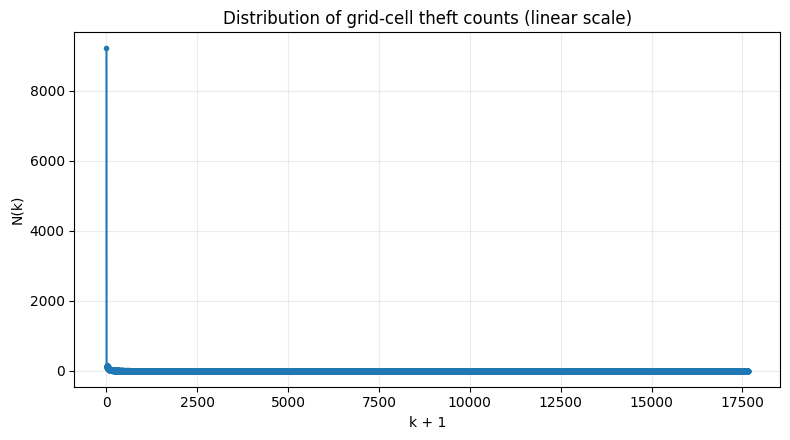

In [13]:
# Step 4: plot k+1 vs N(k) on linear axes
import matplotlib.pyplot as plt

x = k_values + 1
y = Nk

plt.figure(figsize=(8, 4.5))
plt.plot(x, y, marker='o', linestyle='-', linewidth=1.5, markersize=3)
plt.xlabel('k + 1')
plt.ylabel('N(k)')
plt.title('Distribution of grid-cell theft counts (linear scale)')
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.

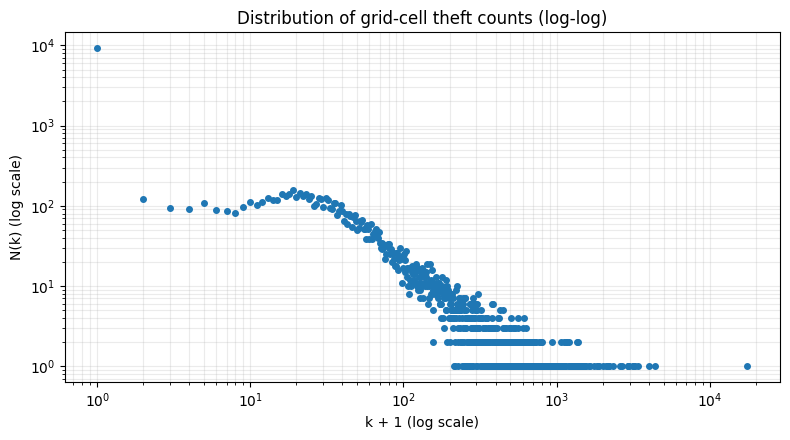

In [14]:
# Step 5: plot k+1 vs N(k) on log-log axes
import matplotlib.pyplot as plt

x = k_values + 1
y = Nk

# Keep only strictly positive values for log-log plotting
mask = y > 0
x_log = x[mask]
y_log = y[mask]

plt.figure(figsize=(8, 4.5))
plt.loglog(x_log, y_log, marker='o', linestyle='none', markersize=4)
plt.xlabel('k + 1 (log scale)')
plt.ylabel('N(k) (log scale)')
plt.title('Distribution of grid-cell theft counts (log-log)')
plt.grid(alpha=0.25, which='both')
plt.tight_layout()
plt.show()



>   - *Step 6:* Answer the question. Was it correct of me to assume that there is a power-law distribution of theft?

Partially yes, but not as a clean universal power law.
The log-log plot shows a strongly heavy-tailed pattern: most grid cells have zero or very few thefts, while a small number of cells have very high counts. That supports the core idea of extreme spatial concentration. However, the full curve is not a straight line across all scales (especially with the large mass at k=0 and curvature in the middle range), so it is more accurate to say the data is heavy-tailed and may follow a power-law-like behavior only in part of the tail, not globally.

>   - *Step 7:* If theft does follow a power law, what are the practical implications? What does this extreme spatial concentration mean for policing, for city planning, and for the people who live in those hotspots? Does the "average" crime rate for a neighborhood even make sense as a statistic when the distribution looks like this?

If theft is this spatially concentrated, the practical implication is that “place” dominates risk: a small set of micro-locations drives a disproportionate share of incidents. For policing, this suggests targeted hotspot strategies can be efficient, but they also risk feedback loops (more patrols -> more recorded incidents -> even more patrols), so deployment should be combined with safeguards and outcome monitoring. For city planning, concentration points to highly local drivers (street design, lighting, transit nodes, parking patterns, land use), meaning interventions should be block-level rather than district-wide. For residents, it means safety can vary dramatically within the same neighborhood, sometimes from one street to the next. In that context, a neighborhood “average crime rate” is often too coarse and can be misleading: it hides extreme within-neighborhood inequality and can blur where prevention is actually needed.

<div class="alert alert-block alert-info">
LLM notes are in gray in the text. The final question (Step 7) should be your own thinking.
</div>

## Part 3: Linear Regression

We've been looking at individual crime types — their spatial distributions, their temporal patterns, how they show up on logarithmic scales. Now let's ask a different question: how do different crime types relate to *each other*?

Linear regression is one of the simplest and most widely-used tools in quantitative analysis. It's also the conceptual foundation for understanding more complex models — if you understand what a linear fit can and can't tell you, you're well-equipped to reason about fancier techniques later. Here, we'll use it to compare the weekly rhythms of your Personal Focus Crimes and find out which pairs march to the same beat — and which ones are completely out of sync.

> *Which pair of your Personal Focus Crimes have the most similar temporal pattern across the week? (And which pair is most dissimilar).*

One way to answer this question is to plot the activity for all pairs of crime types as a scatter plot per pair. One crime type on each axis, where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.)

For this exercise, **select 9 of your Personal Focus Crimes** (from Week 2). If you have fewer than 9, use all of them and come up with a reasonable grid. With 9 crimes, you get $\binom{9}{2} = 36$ pairwise comparisons. 

*Exercise 3.1:* Create the 36 scatterplots.
> * Display the plots in a $6$ by $6$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $6$ across and $6$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * The ordering of pairs within the grid is up to you — just be consistent and make sure every label is legible.
>     * Make sure that you squeeze the subplots closely together so each plot can be as big as possible.

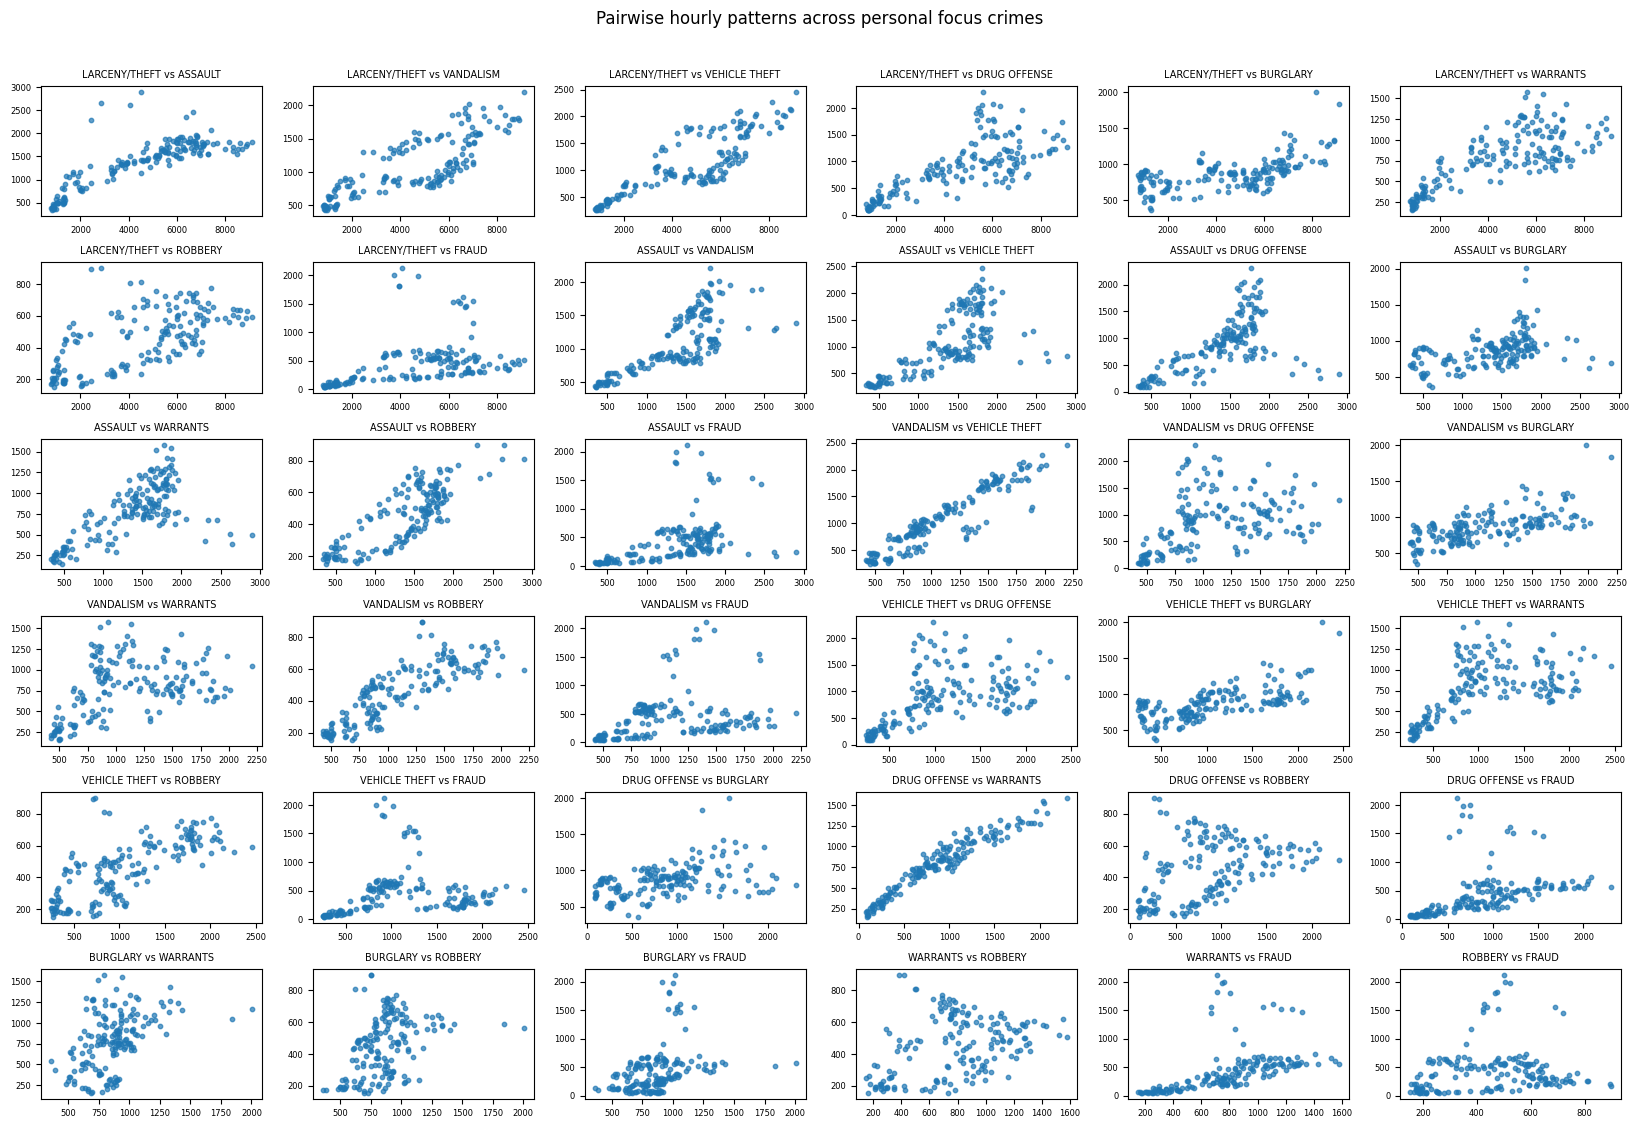

Selected crimes (9): ['LARCENY/THEFT', 'ASSAULT', 'VANDALISM', 'VEHICLE THEFT', 'DRUG OFFENSE', 'BURGLARY', 'WARRANTS', 'ROBBERY', 'FRAUD']
Number of pairwise scatterplots: 36


In [ ]:
# Exercise 3.1 (first part): 36 pairwise scatterplots in a 6x6 grid
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if "personal_focus_crime" not in df.columns or "hour_of_week" not in df.columns:
    raise KeyError("Columns 'personal_focus_crime' and/or 'hour_of_week' are missing from df")

# Use all data (all years), selecting up to 9 most frequent personal focus crimes
counts = (
    df["personal_focus_crime"]
    .value_counts()
)
selected_crimes = counts.head(9).index.tolist()

# Build hourly profiles (168 hours/week) for selected crimes
work = df.loc[df["personal_focus_crime"].isin(selected_crimes), ["personal_focus_crime", "hour_of_week"]].copy()

hour_index = pd.Index(range(168), name="hour_of_week")
profiles = (
    work.groupby(["hour_of_week", "personal_focus_crime"]).size()
    .unstack(fill_value=0)
    .reindex(index=hour_index, columns=selected_crimes, fill_value=0)
)

pairs = list(itertools.combinations(selected_crimes, 2))

# 9 crimes => 36 pairs => 6x6 as requested; fallback layout if fewer than 9
if len(selected_crimes) == 9:
    nrows, ncols = 6, 6
else:
    nplots = len(pairs)
    ncols = int(np.ceil(np.sqrt(nplots)))
    nrows = int(np.ceil(nplots / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(16.5, 11.7), constrained_layout=False)
axes = np.array(axes).reshape(-1)

for ax, (c1, c2) in zip(axes, pairs):
    x = profiles[c1].values
    y = profiles[c2].values
    ax.scatter(x, y, s=10, alpha=0.7)
    ax.set_title(f"{c1} vs {c2}", fontsize=7)
    ax.tick_params(axis="both", labelsize=6)

# Hide any unused axes (only relevant for fallback layout)
for ax in axes[len(pairs):]:
    ax.axis("off")

fig.suptitle("Pairwise hourly patterns across personal focus crimes", fontsize=12)
fig.tight_layout(rect=[0, 0.02, 1, 0.97], w_pad=0.8, h_pad=0.8)
plt.show()

print(f"Selected crimes ({len(selected_crimes)}): {selected_crimes}")

> * Just inspecting this matrix, which crime-types look correlated and which ones look like they're very different?
> * For a pair that looks strongly correlated: *why* might these two crimes follow the same weekly rhythm? What shared factors could drive both?
> * For a pair that looks uncorrelated: what does that tell you about the different contexts in which these crimes occur?

<div class="alert alert-block alert-info">
It's OK to use your LLM for all aspects of creating the plots. The interpretation should be your own thinking.
</div>

From visual inspection of the 6x6 matrix:

- **Pairs that look clearly correlated**: `DRUG OFFENSE` vs `WARRANTS` (strongest), `VANDALISM` vs `VEHICLE THEFT`, and `LARCENY/THEFT` vs `VEHICLE THEFT`.
- **Pairs that look very different / weakly correlated**: `ROBBERY` vs `FRAUD`, `WARRANTS` vs `ROBBERY`, and several pairs involving `FRAUD` (high scatter, outlier-sensitive pattern).

For a strongly correlated pair such as **DRUG OFFENSE vs WARRANTS**:
- A plausible reason is shared enforcement and street-activity rhythms. When police activity and street presence increase at specific hours/days, both categories can rise together.
- Both may also be driven by common urban contexts (nightlife windows, weekend dynamics, hotspot areas).

For a weakly correlated pair such as **ROBBERY vs FRAUD**:
- It suggests the crimes happen in different contexts and time structures.
- Robbery is often tied to immediate public-space interactions, while fraud can be more administrative/delayed-reporting and less tied to street-hour intensity.
- So similar weekly timing is not expected, which is exactly what the diffuse scatter indicates.


---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i y_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A few of years ago, I actually derived the whole thing, it's not hard, but it takes up a lot of space, so I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise 3.2:* Linear regression. 

> * Using Equation 1 and 2 above, calculate the slopes for $a$ and $b$ in each case and add them to the plot. (You are free to compare the results with ones obtained using a package like `sklearn` to check that everything is working as expected.) <font color=gray>See if you can do this by yourself without LLM help</font>.
> * You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue). <font color=gray>It's OK use full LLM help here</font>
> * Do any patterns stand out as you inspect the plot? Mention one or two that catch your eye -- it may be both because the sequences are similar or because they are different, or something entirely different altogether.

<div class="alert alert-block alert-info">
See LLM comments in gray.
</div>

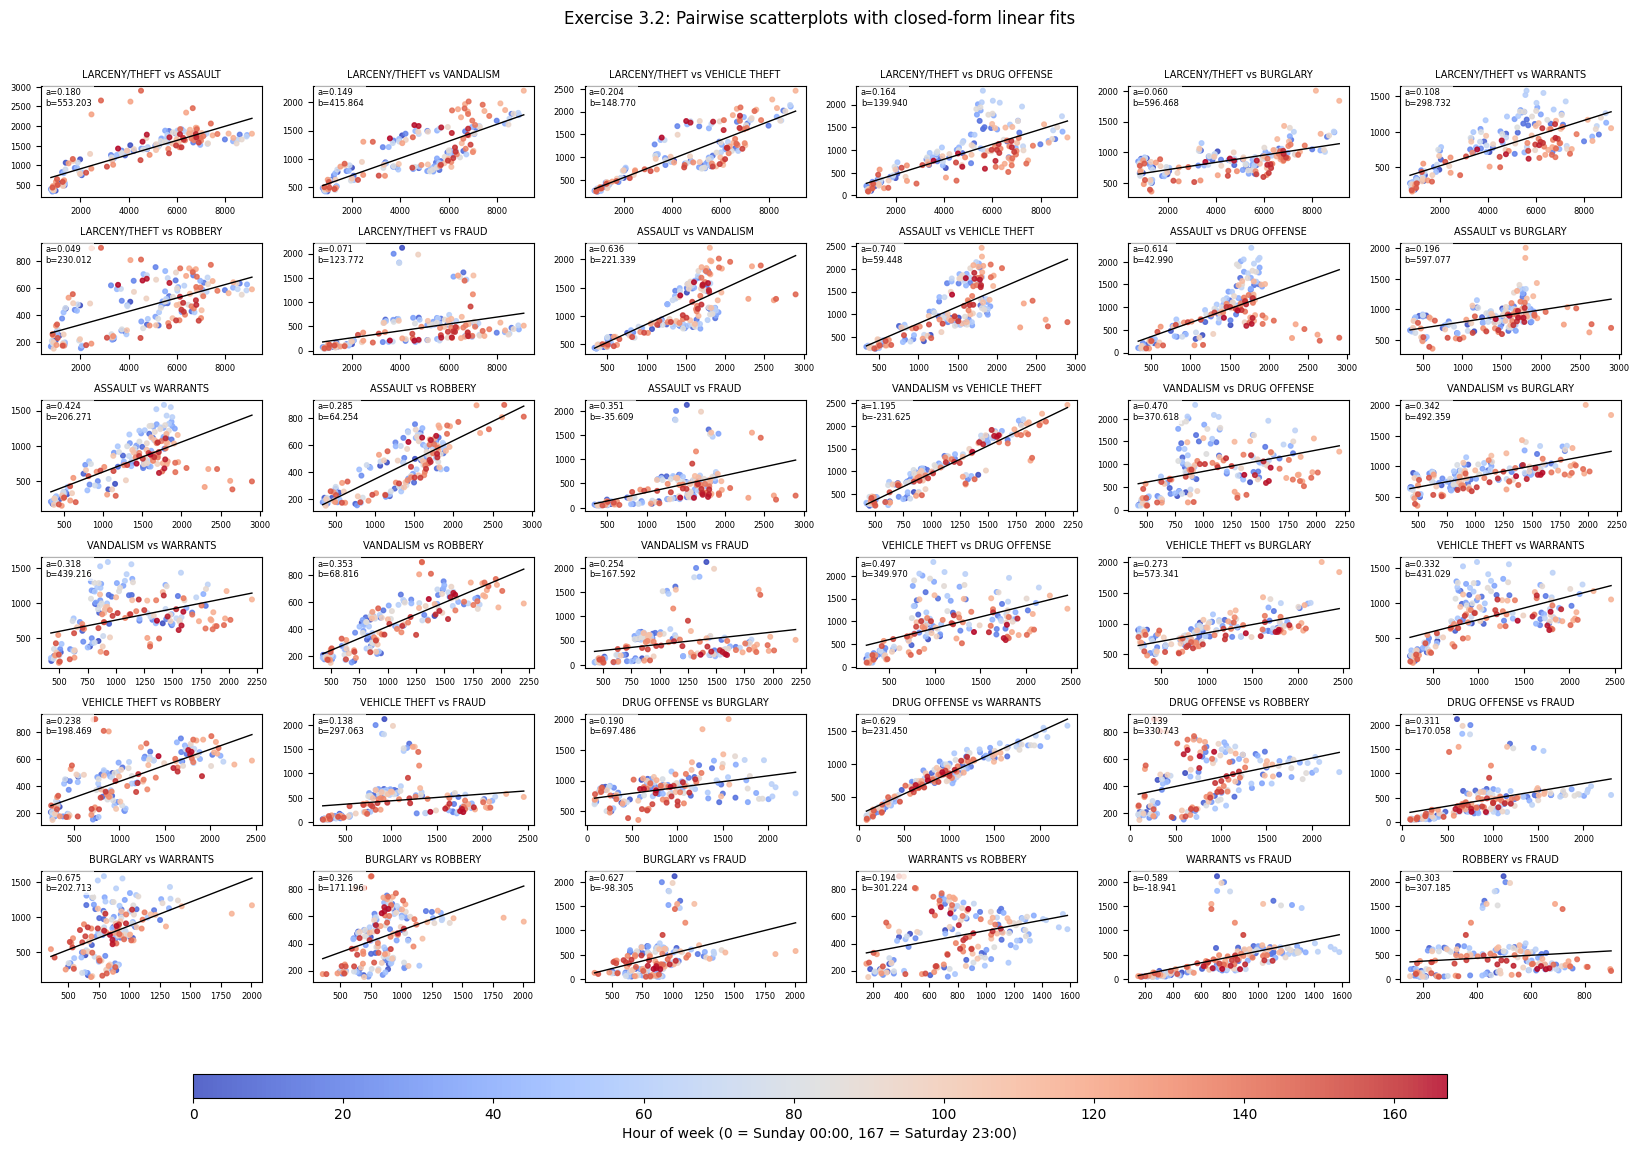

sklearn check with tolerance 1e-10: True


,pair,a_closed,a_sklearn,abs_diff_a,b_closed,b_sklearn,abs_diff_b,match_within_tol
0,BURGLARY vs WARRANTS,0.674653,0.674653,9.992007e-16,202.712876,202.712876,9.094947e-13,True
1,ASSAULT vs VEHICLE THEFT,0.740423,0.740423,7.771561e-16,59.447871,59.447871,1.023182e-12,True
2,VANDALISM vs BURGLARY,0.342069,0.342069,7.771561e-16,492.358771,492.358771,8.526513e-13,True
3,VANDALISM vs VEHICLE THEFT,1.194928,1.194928,6.661338e-16,-231.625201,-231.625201,6.821210e-13,True
4,ROBBERY vs FRAUD,0.302997,0.302997,6.661338e-16,307.185056,307.185056,2.842171e-13,True
5,ASSAULT vs VANDALISM,0.635900,0.635900,5.551115e-16,221.339486,221.339486,6.821210e-13,True
6,BURGLARY vs ROBBERY,0.326353,0.326353,5.551115e-16,171.195587,171.195587,5.115908e-13,True
7,WARRANTS vs FRAUD,0.589253,0.589253,5.551115e-16,-18.941360,-18.941360,3.979039e-13,True
8,VANDALISM vs WARRANTS,0.318432,0.318432,4.440892e-16,439.216072,439.216072,4.547474e-13,True
9,VANDALISM vs ROBBERY,0.352661,0.352661,4.440892e-16,68.815956,68.815956,4.547474e-13,True


In [20]:
# Exercise 3.2 (first two bullets): closed-form linear fit + hour-of-week color gradient
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

if "profiles" not in globals() or "selected_crimes" not in globals():
    raise RuntimeError("Run the Exercise 3.1 cell first (it defines 'profiles' and 'selected_crimes').")

pairs = list(itertools.combinations(selected_crimes, 2))

# 9 crimes -> 36 pairs -> 6x6
if len(selected_crimes) == 9:
    nrows, ncols = 6, 6
else:
    nplots = len(pairs)
    ncols = int(np.ceil(np.sqrt(nplots)))
    nrows = int(np.ceil(nplots / ncols))

hours = np.arange(168)
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=167)

# Store coefficients
ab_by_pair = {}
coef_check_rows = []

fig, axes = plt.subplots(nrows, ncols, figsize=(16.5, 11.7), constrained_layout=False)
axes = np.array(axes).reshape(-1)

for ax, (c1, c2) in zip(axes, pairs):
    x = profiles[c1].values.astype(float)
    y = profiles[c2].values.astype(float)
    N = len(x)

    # Equation (2): slope a
    x_mean = x.mean()
    y_mean = y.mean()
    num = np.sum(x * y) - N * x_mean * y_mean
    den = np.sum(x * x) - N * (x_mean ** 2)
    a = num / den if den != 0 else np.nan

    # Equation (1): intercept b
    b = y_mean - a * x_mean if np.isfinite(a) else np.nan
    ab_by_pair[(c1, c2)] = (a, b)

    # Optional sklearn check
    if np.isfinite(a) and np.isfinite(b):
        model = LinearRegression().fit(x.reshape(-1, 1), y)
        a_sk = float(model.coef_[0])
        b_sk = float(model.intercept_)
        coef_check_rows.append({
            "pair": f"{c1} vs {c2}",
            "a_closed": a,
            "a_sklearn": a_sk,
            "abs_diff_a": abs(a - a_sk),
            "b_closed": b,
            "b_sklearn": b_sk,
            "abs_diff_b": abs(b - b_sk),
        })

    # Scatter with hour-of-week gradient (0..167)
    sc = ax.scatter(x, y, c=hours, cmap=cmap, norm=norm, s=11, alpha=0.85)

    # Fitted line
    if np.isfinite(a) and np.isfinite(b):
        xx = np.linspace(x.min(), x.max(), 100)
        yy = a * xx + b
        ax.plot(xx, yy, color="black", linewidth=1.0)

    ax.set_title(f"{c1} vs {c2}", fontsize=7)
    ax.text(
        0.02, 0.98,
        f"a={a:.3f}\nb={b:.3f}",
        transform=ax.transAxes,
        ha="left", va="top",
        fontsize=6,
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", pad=1.5),
    )
    ax.tick_params(axis="both", labelsize=6)

for ax in axes[len(pairs):]:
    ax.axis("off")

# Place colorbar in a dedicated axis below the full subplot grid
fig.suptitle("Exercise 3.2: Pairwise scatterplots with closed-form linear fits", fontsize=12)
fig.tight_layout(rect=[0, 0.12, 1, 0.97], w_pad=0.8, h_pad=0.8)

cax = fig.add_axes([0.12, 0.05, 0.76, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cax, orientation="horizontal")
cbar.set_label("Hour of week (0 = Sunday 00:00, 167 = Saturday 23:00)")

plt.show()

# Coefficient comparison table (closed-form vs sklearn)
if len(coef_check_rows) > 0:
    coef_check_df = pd.DataFrame(coef_check_rows)
    tol = 1e-10
    coef_check_df["match_within_tol"] = (
        (coef_check_df["abs_diff_a"] <= tol) & (coef_check_df["abs_diff_b"] <= tol)
    )
    coef_check_df = coef_check_df.sort_values(["abs_diff_a", "abs_diff_b"], ascending=False)
    print(f"sklearn check with tolerance {tol}: {coef_check_df['match_within_tol'].all()}")
    display(coef_check_df.reset_index(drop=True))
else:
    print("sklearn not available; skipped coefficient cross-check table.")



---

But the question we started with was "Which pair of Personal Focus Crimes have the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. 

Basically $R^2$ is a measure of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise 3.3:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit. (Again you can compare it with a package to check that it works, e.g. the one provided by the function `score()` in `sklearn`.) <font color=gray>Try this without the help of an LLM.</font>

In [21]:
# Exercise 3.3 - bullet 1: R^2 function + check against sklearn.score()

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import itertools

def r2_score_manual(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_true.mean()) ** 2)
    if ss_tot == 0:
        return np.nan
    return 1 - ss_res / ss_tot

r2_rows = []

pairs = list(itertools.combinations(selected_crimes, 2))

for c1, c2 in pairs:
    x = profiles[c1].values.astype(float)
    y = profiles[c2].values.astype(float)

    # closed-form a,b from previous exercise (or recompute)
    N = len(x)
    x_mean, y_mean = x.mean(), y.mean()
    a = (np.sum(x*y) - N*x_mean*y_mean) / (np.sum(x*x) - N*(x_mean**2))
    b = y_mean - a*x_mean

    y_hat = a*x + b
    r2_manual = r2_score_manual(y, y_hat)

    model = LinearRegression().fit(x.reshape(-1, 1), y)
    r2_sklearn = model.score(x.reshape(-1, 1), y)

    r2_rows.append({
        "pair": f"{c1} vs {c2}",
        "R2_manual": r2_manual,
        "R2_sklearn": r2_sklearn,
        "abs_diff": abs(r2_manual - r2_sklearn),
    })

r2_df = pd.DataFrame(r2_rows).sort_values("abs_diff", ascending=False).reset_index(drop=True)
display(r2_df)
print("All close:", np.allclose(r2_df["R2_manual"], r2_df["R2_sklearn"], atol=1e-12))

,pair,R2_manual,R2_sklearn,abs_diff
0,VANDALISM vs WARRANTS,0.170388,0.170388,2.220446e-16
1,VANDALISM vs DRUG OFFENSE,0.158271,0.158271,2.220446e-16
2,LARCENY/THEFT vs VANDALISM,0.652422,0.652422,1.110223e-16
3,LARCENY/THEFT vs BURGLARY,0.379220,0.379220,1.110223e-16
4,ROBBERY vs FRAUD,0.018464,0.018464,1.110223e-16
5,DRUG OFFENSE vs BURGLARY,0.185069,0.185069,1.110223e-16
6,VEHICLE THEFT vs DRUG OFFENSE,0.292290,0.292290,1.110223e-16
7,LARCENY/THEFT vs ROBBERY,0.402853,0.402853,1.110223e-16
8,VANDALISM vs BURGLARY,0.428214,0.428214,1.110223e-16
9,VANDALISM vs ROBBERY,0.700332,0.700332,1.110223e-16


All close: True


> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). <font color=gray>Try this without the help of an LLM, at least first. Then you may ask it to see if you got it right.</font>

In simple linear regression with an intercept, the relationship is

$$
R^2 = r^2,
$$

where $r$ is the Pearson correlation coefficient between $x$ and $y$.

Interpretation:
- $r \in [-1,1]$ measures direction and strength of linear association.
- $R^2 \in [0,1]$ measures the proportion of variance in $y$ explained by the linear model.
- Squaring removes the sign, so both strong positive and strong negative linear relationships give high $R^2$.

A weak linear relationship ($r \approx 0$) gives $R^2 \approx 0$.

Important caveat: the exact identity $R^2 = r^2$ holds for one-predictor linear regression with intercept.

> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?

From the $R^2$ results, the **most similar** pair is **`DRUG OFFENSE` vs `WARRANTS`** with

$$
R^2 = 0.926072.
$$

This is very high, so their weekly patterns are strongly aligned. This makes sense: both categories are often linked to policing/enforcement activity and may respond to similar time-of-week dynamics (street activity intensity, patrol focus, nightlife windows).

> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not? Does it corresponds with your observations from the previous exercise?

The **most dissimilar** pair is **`ROBBERY` vs `FRAUD`** with

$$
R^2 = 0.018464.
$$

That value is close to $0$, so a linear model explains almost none of the shared hourly variation. This also makes sense: robbery is usually tied to immediate street-level interactions, while fraud is often reported/processed with different timing and context.

Yes, this is consistent with the visual inspection from Exercise 3.1, where pairs involving `FRAUD` (and especially `ROBBERY` vs `FRAUD`) looked much more diffuse and weakly structured.

> * Create a final mega-plot with all 36 scatter plots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes. <font color=gray>Totally fine to use an LLM to help you organize the plot and make it look amazing.</font>


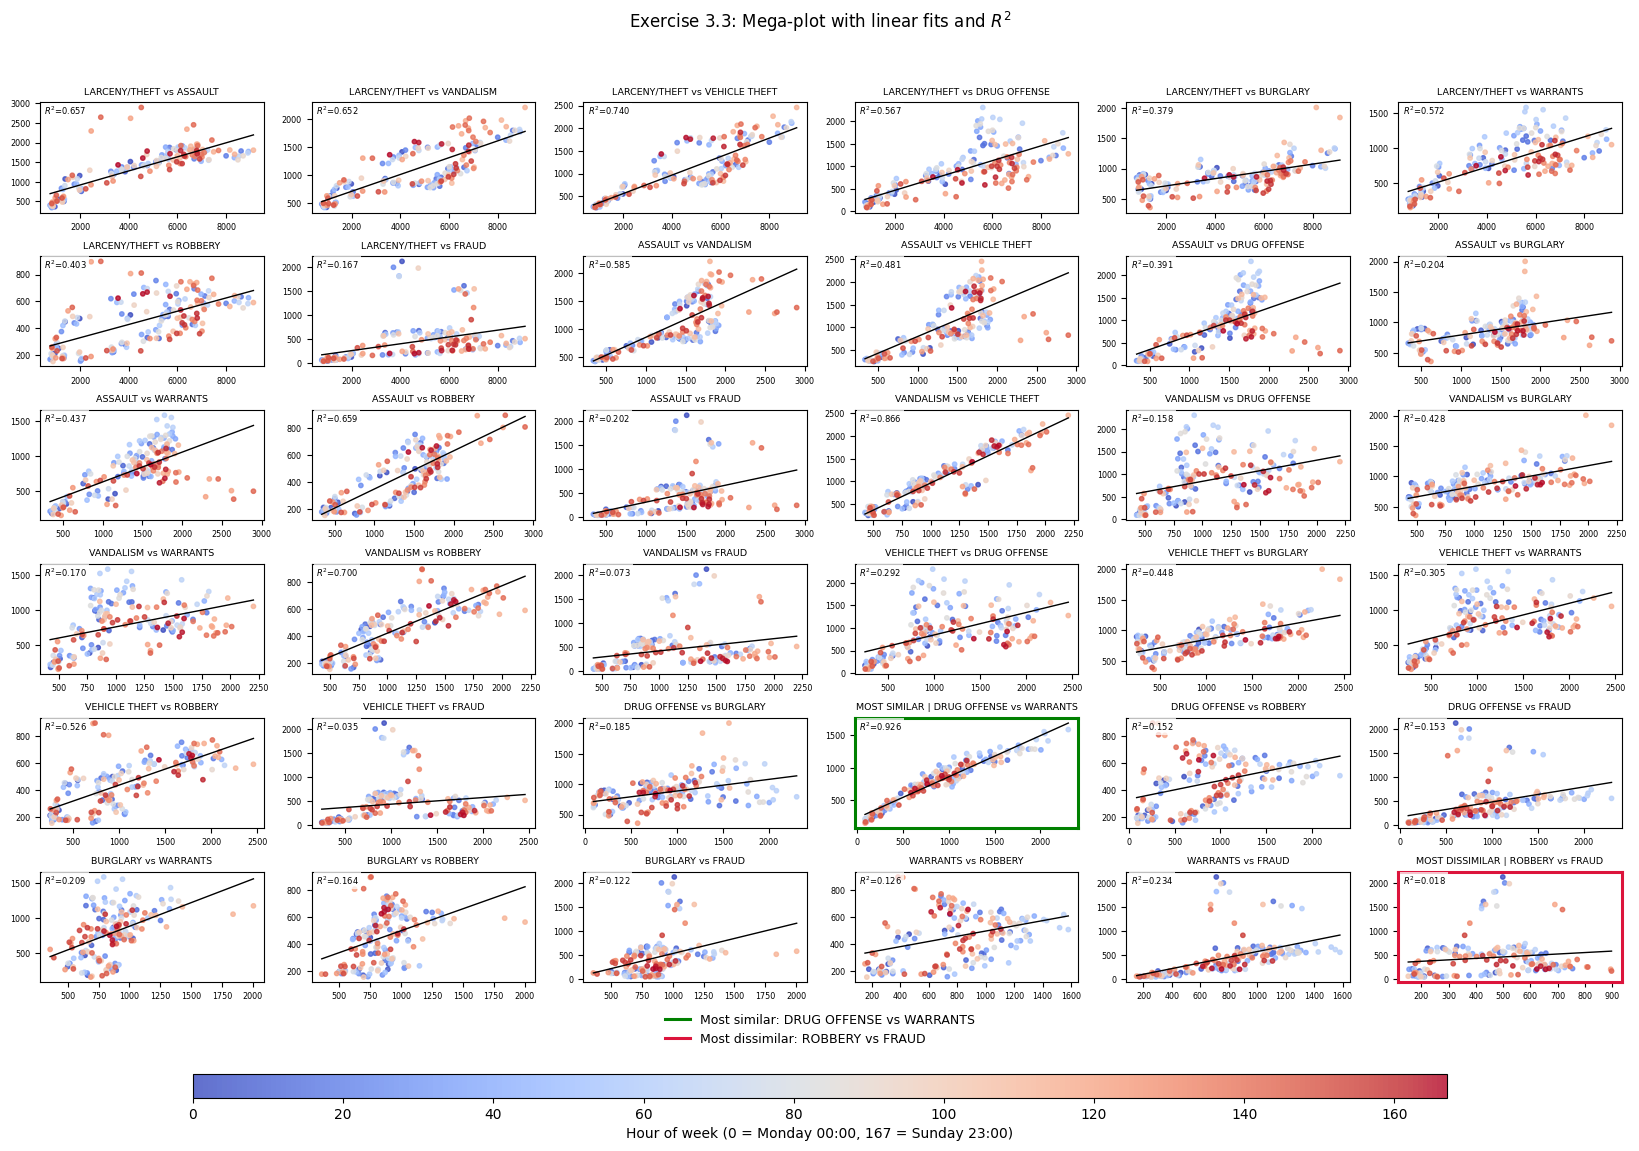

Most similar pair by R^2: DRUG OFFENSE vs WARRANTS | R^2=0.926072
Most dissimilar pair by R^2: ROBBERY vs FRAUD | R^2=0.018464


In [22]:
# Exercise 3.3 - final mega-plot: 36 scatterplots + fit + R^2 + highlighted best/worst pairs
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

if "profiles" not in globals() or "selected_crimes" not in globals():
    raise RuntimeError("Run Exercise 3.1 first (requires 'profiles' and 'selected_crimes').")

pairs = list(itertools.combinations(selected_crimes, 2))

if len(selected_crimes) == 9:
    nrows, ncols = 6, 6
else:
    nplots = len(pairs)
    ncols = int(np.ceil(np.sqrt(nplots)))
    nrows = int(np.ceil(nplots / ncols))

hours = np.arange(168)
cmap = plt.cm.coolwarm
norm = plt.Normalize(vmin=0, vmax=167)

def fit_closed_form(x, y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    num = np.sum(x * y) - N * x_mean * y_mean
    den = np.sum(x * x) - N * (x_mean ** 2)
    a = num / den if den != 0 else np.nan
    b = y_mean - a * x_mean if np.isfinite(a) else np.nan
    return a, b

def r2_manual(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_true.mean()) ** 2)
    return np.nan if ss_tot == 0 else 1 - ss_res / ss_tot

# Compute fit + R^2 for all pairs first, so we can identify best/worst
stats_by_pair = {}
for c1, c2 in pairs:
    x = profiles[c1].values.astype(float)
    y = profiles[c2].values.astype(float)
    a, b = fit_closed_form(x, y)
    y_hat = a * x + b if np.isfinite(a) and np.isfinite(b) else np.full_like(y, np.nan)
    r2 = r2_manual(y, y_hat) if np.all(np.isfinite(y_hat)) else np.nan
    stats_by_pair[(c1, c2)] = {"a": a, "b": b, "r2": r2}

valid_pairs = [p for p in pairs if np.isfinite(stats_by_pair[p]["r2"])]
best_pair = max(valid_pairs, key=lambda p: stats_by_pair[p]["r2"])
worst_pair = min(valid_pairs, key=lambda p: stats_by_pair[p]["r2"])

fig, axes = plt.subplots(nrows, ncols, figsize=(16.5, 11.7), constrained_layout=False)
axes = np.array(axes).reshape(-1)

for ax, (c1, c2) in zip(axes, pairs):
    x = profiles[c1].values.astype(float)
    y = profiles[c2].values.astype(float)
    a = stats_by_pair[(c1, c2)]["a"]
    b = stats_by_pair[(c1, c2)]["b"]
    r2 = stats_by_pair[(c1, c2)]["r2"]

    sc = ax.scatter(x, y, c=hours, cmap=cmap, norm=norm, s=10, alpha=0.8)

    if np.isfinite(a) and np.isfinite(b):
        xx = np.linspace(x.min(), x.max(), 100)
        yy = a * xx + b
        ax.plot(xx, yy, color="black", linewidth=1.0)

    title = f"{c1} vs {c2}"
    if (c1, c2) == best_pair:
        title = "MOST SIMILAR | " + title
    elif (c1, c2) == worst_pair:
        title = "MOST DISSIMILAR | " + title
    ax.set_title(title, fontsize=6.8)

    ax.text(
        0.02,
        0.98,
        f"$R^2$={r2:.3f}",
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=6,
        bbox=dict(facecolor="white", alpha=0.75, edgecolor="none", pad=1.5),
    )

    # Highlight best/worst panels via border color/thickness
    if (c1, c2) == best_pair:
        for spine in ax.spines.values():
            spine.set_edgecolor("green")
            spine.set_linewidth(2.2)
    elif (c1, c2) == worst_pair:
        for spine in ax.spines.values():
            spine.set_edgecolor("crimson")
            spine.set_linewidth(2.2)

    ax.tick_params(axis="both", labelsize=5.8)

for ax in axes[len(pairs):]:
    ax.axis("off")

fig.suptitle("Exercise 3.3: Mega-plot with linear fits and $R^2$", fontsize=12)
fig.tight_layout(rect=[0, 0.12, 1, 0.96], w_pad=0.7, h_pad=0.7)

# Bottom colorbar in dedicated axis
cax = fig.add_axes([0.12, 0.05, 0.76, 0.02])
cbar = fig.colorbar(sc, cax=cax, orientation="horizontal")
cbar.set_label("Hour of week (0 = Monday 00:00, 167 = Sunday 23:00)")

# Figure-level legend for highlighted panels
legend_handles = [
    Line2D([0], [0], color="green", lw=2.2, label=f"Most similar: {best_pair[0]} vs {best_pair[1]}"),
    Line2D([0], [0], color="crimson", lw=2.2, label=f"Most dissimilar: {worst_pair[0]} vs {worst_pair[1]}"),
]
fig.legend(handles=legend_handles, loc="lower center", bbox_to_anchor=(0.5, 0.085), ncol=1, frameon=False, fontsize=9)

plt.show()

print(f"Most similar pair by R^2: {best_pair[0]} vs {best_pair[1]} | R^2={stats_by_pair[best_pair]['r2']:.6f}")
print(f"Most dissimilar pair by R^2: {worst_pair[0]} vs {worst_pair[1]} | R^2={stats_by_pair[worst_pair]['r2']:.6f}")

> * **Connecting back to Week 1**: Think about what your most correlated crime pair means in the context of predictive policing. If a system uses patterns from one crime type to allocate resources for another (because they're correlated), what could go wrong? Consider especially what happens if one of the correlated crimes is enforcement-driven (like drug offenses — more police presence leads to more arrests, which looks like "more crime"). How does this relate to the feedback loops discussed in the Richardson et al. reading?

<div class="alert alert-block alert-info">
See LLM comments in gray. The final reflection question should be your own thinking — this is where you connect the technical work to the bigger picture from Week 1.
</div>

Our most correlated pair is `DRUG OFFENSE` and `WARRANTS`, but that does **not** mean one is a clean causal signal for the other. In predictive policing, using this correlation to reallocate patrols can be dangerous because both categories are strongly affected by enforcement intensity.

If police are sent to places where the model expects these crimes, they will likely record more drug arrests and warrant-related incidents there. Those new records then confirm the model's original belief, so the system keeps sending even more police to the same areas. This is the Week 1 feedback-loop problem from Richardson et al.: data partly reflects policing decisions, not only underlying harm.

So the practical risk is a self-reinforcing cycle of over-policing in already-targeted neighborhoods, while other places and offense types may be under-observed. Correlation can improve prediction metrics, but without causal safeguards it can amplify bias and inequality.



---

## You've Completed Week 4!

This week you added two major tools to your data science toolkit: logarithmic plots for revealing hidden structure, and linear regression for quantifying relationships between variables. You now have:

- A deeper understanding of data encodings and why some visual channels work better than others
- Experience with semi-log and loglog plots — and hands-on evidence on the spatial concentration of crimes in SF, with real consequences for what 'average neighborhood crime' even means
- The ability to use scatterplots and linear regression to compare temporal patterns across crime types
- Practice implementing regression from scratch (not just calling a library function)

**Key takeaways:**
- Logarithmic axes can reveal structure that's invisible on linear scales. Always consider whether your data spans multiple orders of magnitude.
- Power laws are everywhere in social data. When crime concentrates in a tiny number of hotspots, policies built on neighborhood averages can be deeply misleading — or even harmful.
- $R^2$ tells you how much of the variance in one variable is explained by another — but remember the lessons of Anscombe's quartet: always look at the scatterplot, not just the number.
- Crime types that correlate strongly may share underlying drivers (e.g., opportunity, time-of-day patterns). Crime types that don't correlate may respond to very different factors.

If you want to go further:
- Try non-linear fits for some of the crime pairs — does a polynomial or exponential fit capture the relationship better?
- Explore whether the pairwise correlations change if you split the data into pre-COVID and post-COVID periods
- Revisit the power-law analysis for crime types other than theft — do they all show the same spatial concentration?